<h1 style="color:purple;">Min-Max Normalizasyonu</h1>

<p style="color:green; font-weight:bold; font-size:15px;">Min-Max Normalizasyonu, genellikle veri ön işleme aşamasında kullanılan bir tekniktir.</p>
<p style="color:green; font-weight:bold; font-size:15px;">Bu teknik, farklı aralıklarda ifade edilen verileri 0 ile 1 arası bir aralığa dönüştürerek karşılaştırılabilir hale getirmeyi amaçlar.</p>


<h3 style="color:purple;">Çalışma Şekli:</h3>

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

<p style="color:green; font-weight:bold; font-size:15px;"> Veri setindeki her bir özellik (sütun) için en küçük (minimum) ve en büyük (maksimum) değerler bulunur.</p>

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

<p style="color:green; font-weight:bold; font-size:15px;">  Her bir veri noktası için, o özellikteki değerden minimum değerin çıkarılıp, maksimum değer ile minimum değer arasındaki farka bölünür.</p>

\begin{equation}
\text{Normalize Edilmiş Değer} = \frac{x - \min(X)}{\max(X) - \min(X)}
\end{equation}

<p style="color:red; font-weight:bold; font-size:15px;">x: Normalleştirilecek değer</p>
<p style="color:red; font-weight:bold; font-size:15px;">min(X): Veri setindeki özelliğin minimum değeri</p>
<p style="color:red; font-weight:bold; font-size:15px;">max(X): Veri setindeki özelliğin maksimum değeri</p>

<h3 style="color:purple;">Dezavantajları</h3>
<p style="color:green; font-weight:bold; font-size:15px;">  Veri setindeki uç değerlere (outlier) duyarlıdır. Uç değerler normalizasyon işlemini etkileyebilir.</p>
<p style="color:green; font-weight:bold; font-size:15px;"> Veri sıralamasını korur, ancak mesafeleri korumaz. Yani, orijinal veride birbirine yakın olan iki nokta, normalleştirilmiş veride birbirinden çok uzak görünebilir. </p>

<h1 style="color:purple;">Python İle Sağa Çarpık Veri Üzerinde Min-Max Normalizasyonu</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sağa çarpık (sağa çekik) bir dağılım oluşturmak için log-normal dağılım kullanacağız.

mean = 10  # Ortalama
sigma = 1  # Standart sapma

data = np.random.lognormal(mean, sigma, 100000)

# Aykırı değerler oluşturmak için, normal dağılım ile log-normal dağılımın birleşimi olacak şekilde bir veri seti oluşturacağız.

# Normal dağılım parametreleri
normal_mean = 30
normal_sigma = 10

normal_data = np.random.normal(normal_mean, normal_sigma, 5000)

data_with_outliers = np.concatenate((data, normal_data))

# Veriyi bir DataFrame'e dönüştür
df = pd.DataFrame(data_with_outliers, columns=['Değerler'])


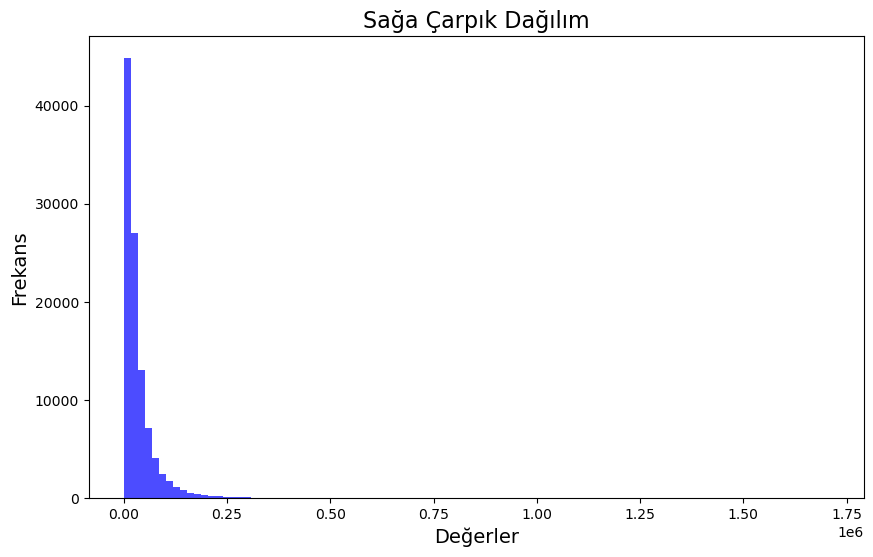

In [2]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=100, color='blue', alpha=0.7)
plt.title('Sağa Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [3]:
df

,Değerler
0,143715.146201
1,94417.634886
2,19991.594458
3,21823.142135
4,22713.983938
...,...
104995,10.786417
104996,35.185826
104997,38.863558
104998,40.760832


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [4]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

-8.36165712899146 1706132.144446778


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [5]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


In [6]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,143715.146201,0.084239
1,94417.634886,0.055345
2,19991.594458,0.011722
3,21823.142135,0.012796
4,22713.983938,0.013318


In [7]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
104995,10.786417,0.000011
104996,35.185826,0.000026
104997,38.863558,0.000028
104998,40.760832,0.000029
104999,25.508797,0.000020


In [8]:
df["Değerler"].describe()

count    1.050000e+05
mean     3.478343e+04
std      4.750053e+04
min     -8.361657e+00
25%      9.944181e+03
50%      2.071449e+04
75%      4.178742e+04
max      1.706132e+06
Name: Değerler, dtype: float64

In [9]:
df["Normalize Edilmiş Değerler"].describe()

count    105000.000000
mean          0.020392
std           0.027841
min           0.000000
25%           0.005833
50%           0.012146
75%           0.024497
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

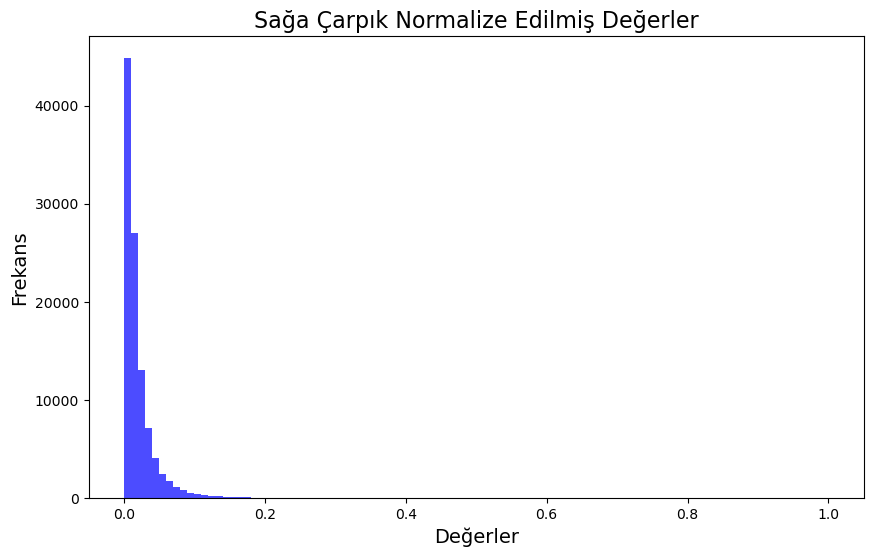

In [10]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df["Normalize Edilmiş Değerler"], bins=100, color='blue', alpha=0.7)
plt.title('Sağa Çarpık Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [11]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

8151

In [12]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

8151

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Sola Çarpık Veri Üzerinde Min-Max Normalizasyonu</h1>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sola çarpık (sola çekik) bir dağılım oluşturmak için negatif log-normal dağılım kullanacağız.
# Bu, normal bir dağılımı negatif logaritmik olarak dönüştürerek sola çarpık bir dağılım elde eder.
# Negatif log-normal dağılımın parametreleri olan mean ve sigma'yı belirleyebiliriz.

mean = 10  # Ortalama
sigma = 1  # Standart sapma

# Negatif log-normal dağılımı oluşturmak için numpy kütüphanesindeki random.lognormal fonksiyonunu kullanacağız.
# Bu fonksiyon, belirtilen ortalama ve standart sapmaya sahip bir negatif log-normal dağılımı döndürür.

data = np.random.lognormal(mean, sigma, 100000) * -1  # Negatif log-normal dağılımı elde etmek için sonucu -1 ile çarpıyoruz

# Aykırı değerler oluşturmak için, normal dağılım ile negatif log-normal dağılımın birleşimi olacak şekilde bir veri seti oluşturacağız.
# Bunu yapmak için, normal dağılımdan bazı rastgele değerler alıp bunları negatif log-normal dağılıma ekleyeceğiz.

# Normal dağılım parametreleri
normal_mean = -30
normal_sigma = 10

# Normal dağılımdan rastgele değerler oluştur
normal_data = np.random.normal(normal_mean, normal_sigma, 5000)

# Normal dağılım ile negatif log-normal dağılımın birleşimi
data_with_outliers = np.concatenate((data, normal_data))


df = pd.DataFrame(data_with_outliers, columns=['Değerler'])


In [14]:
df.head()

,Değerler
0,-20947.727178
1,-9303.685108
2,-32378.701583
3,-1910.695639
4,-23056.624365


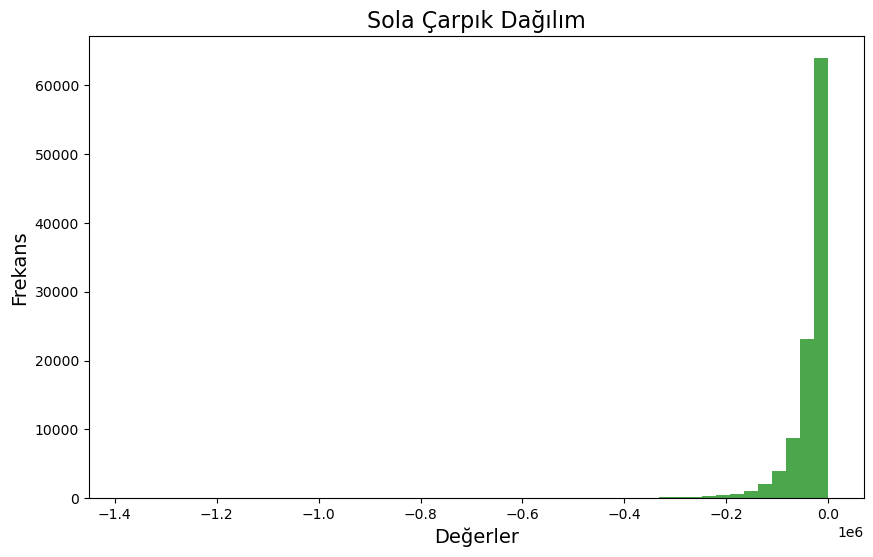

In [15]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=50, color='green', alpha=0.7)
plt.title('Sola Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [16]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

-1381780.3480072594 4.629884715639868


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [17]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


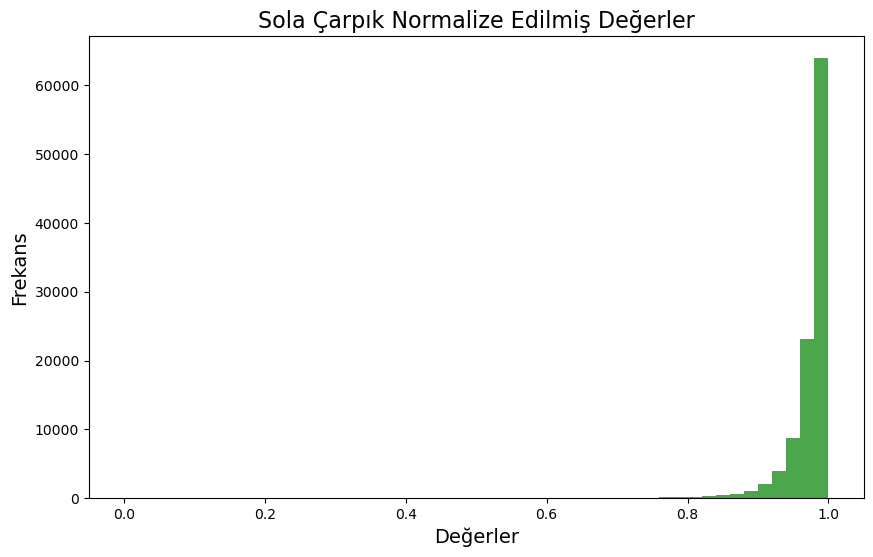

In [18]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'] , bins=50, color='green', alpha=0.7)
plt.title('Sola Çarpık Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [19]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,-20947.727178,0.984837
1,-9303.685108,0.993264
2,-32378.701583,0.976564
3,-1910.695639,0.998614
4,-23056.624365,0.983311


In [20]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
104995,-22.784909,0.999980
104996,-31.772194,0.999974
104997,-37.437157,0.999970
104998,-32.527892,0.999973
104999,-14.938241,0.999986


In [21]:
df["Değerler"].describe()

count    1.050000e+05
mean    -3.464722e+04
std      4.687734e+04
min     -1.381780e+06
25%     -4.166733e+04
50%     -2.073766e+04
75%     -9.898261e+03
max      4.629885e+00
Name: Değerler, dtype: float64

In [22]:
df['Normalize Edilmiş Değerler'].describe()

count    105000.000000
mean          0.974922
std           0.033925
min           0.000000
25%           0.969842
50%           0.984989
75%           0.992833
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [23]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

8053

In [24]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

8053

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle İki Modlu Veri Üzerinde Min-Max Normalizasyonu</h1>

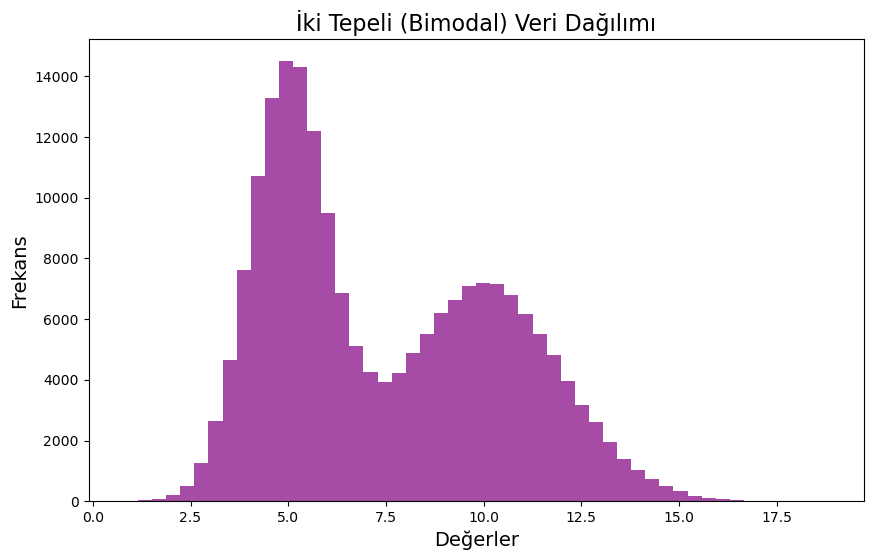

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# İki farklı normal dağılım oluştur
mean1 = 5
std1 = 1
data1 = np.random.normal(mean1, std1, 100000)

mean2 = 10
std2 = 2
data2 = np.random.normal(mean2, std2, 100000)

# İki dağılımı birleştir
bimodal_data = np.concatenate((data1, data2))

# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(bimodal_data, bins=50, color='purple', alpha=0.7)
plt.title('İki Tepeli (Bimodal) Veri Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [26]:
df = pd.DataFrame(bimodal_data, columns=['Değerler'])
df

,Değerler
0,4.640789
1,5.436898
2,5.524195
3,4.590156
4,3.694375
...,...
199995,13.953205
199996,10.791066
199997,10.784214
199998,10.626326


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [27]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

0.7947096910248224 18.823971547256015


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [28]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


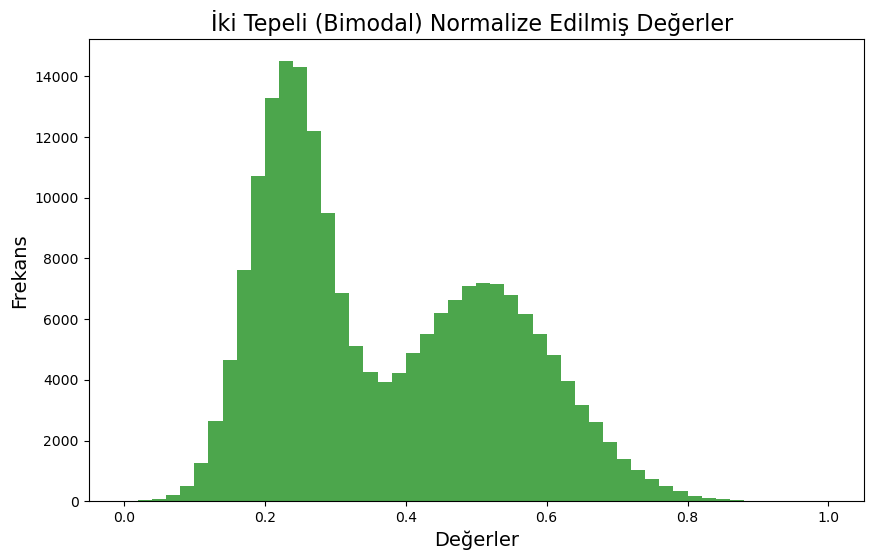

In [29]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'] , bins=50, color='green', alpha=0.7)
plt.title('İki Tepeli (Bimodal) Normalize Edilmiş Değerler ', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [30]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,4.640789,0.213324
1,5.436898,0.257481
2,5.524195,0.262323
3,4.590156,0.210516
4,3.694375,0.160831


In [31]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
199995,13.953205,0.729841
199996,10.791066,0.554452
199997,10.784214,0.554072
199998,10.626326,0.545314
199999,10.693077,0.549017


In [32]:
df['Değerler'].describe()

count    200000.000000
mean          7.497749
std           2.958151
min           0.794710
25%           4.986151
50%           6.666779
75%           9.997121
max          18.823972
Name: Değerler, dtype: float64

In [33]:
df['Normalize Edilmiş Değerler'].describe()

count    200000.000000
mean          0.371787
std           0.164075
min           0.000000
25%           0.232480
50%           0.325697
75%           0.510415
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [34]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

10

In [35]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

10

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Log-Normal Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [36]:
data = np.random.lognormal(mean=0, sigma=1, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])

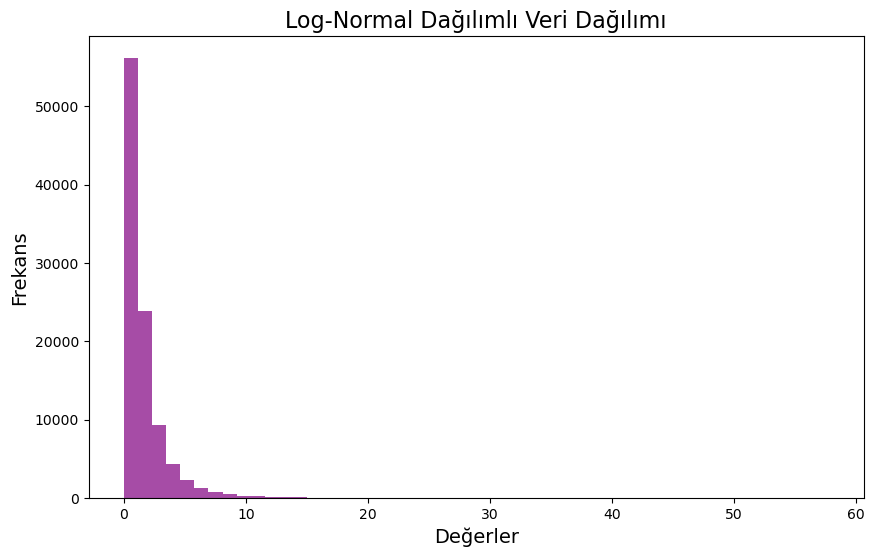

In [37]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='purple', alpha=0.7)
plt.title('Log-Normal Dağılımlı Veri Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [38]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [39]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


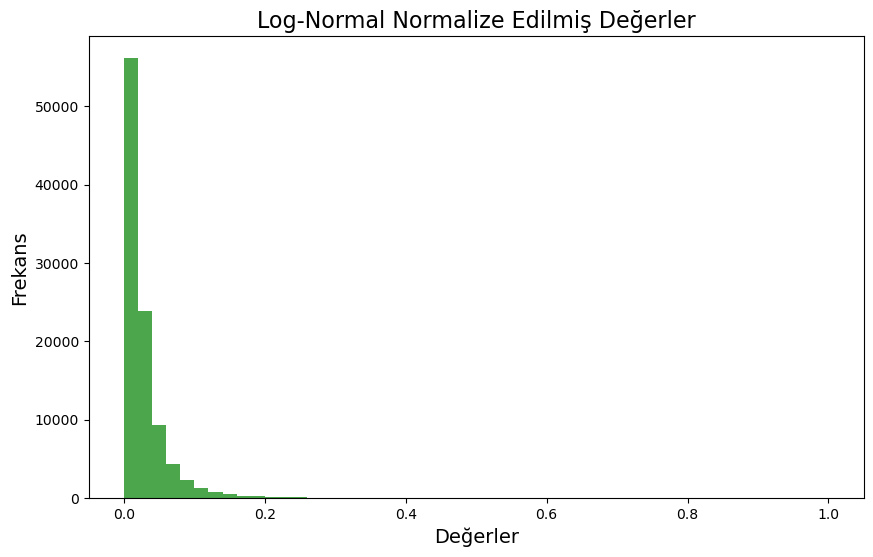

In [40]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Log-Normal Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [41]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,1.178843,0.020249
1,1.541936,0.026539
2,0.432799,0.007323
3,2.399279,0.041393
4,0.717334,0.012253


In [42]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,0.074918,0.001123
99996,1.215049,0.020876
99997,1.227839,0.021097
99998,0.477488,0.008097
99999,0.120542,0.001913


In [43]:
df['Değerler'].describe()

count    100000.000000
mean          1.645588
std           2.156277
min           0.010105
25%           0.508841
50%           0.999367
75%           1.962229
max          57.729590
Name: Değerler, dtype: float64

In [44]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.028335
std           0.037358
min           0.000000
25%           0.008641
50%           0.017139
75%           0.033821
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [45]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

7686

In [46]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

7686

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Beta Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [47]:
data = np.random.beta(a=2, b=5, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])


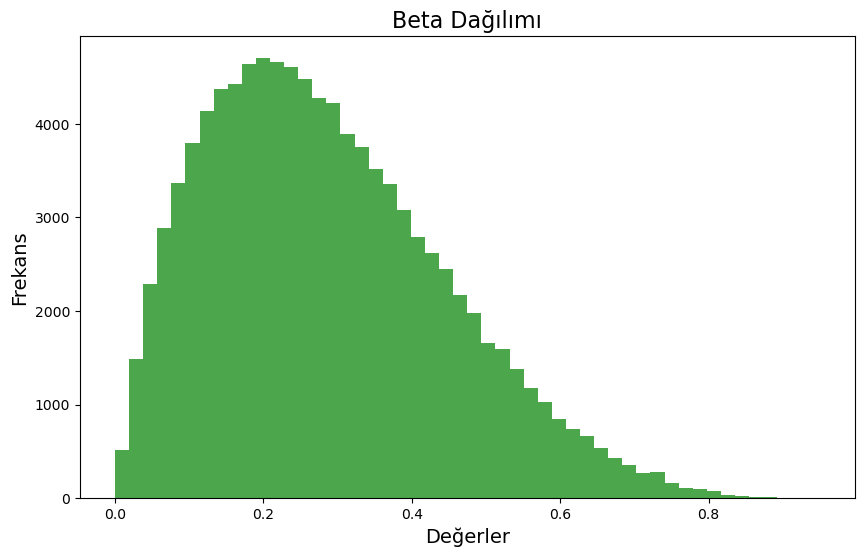

In [48]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='green', alpha=0.7)
plt.title('Beta Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [49]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [50]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


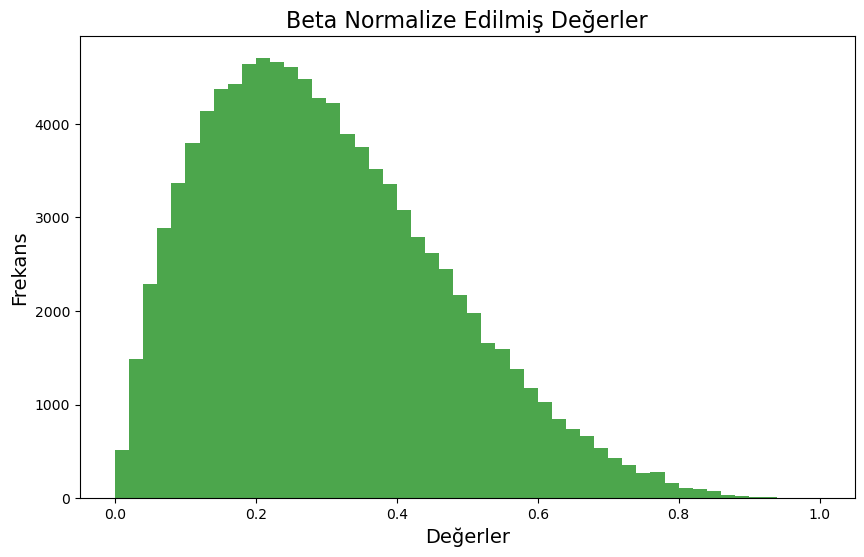

In [51]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Beta Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [52]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,0.374309,0.394119
1,0.516261,0.543649
2,0.361305,0.380420
3,0.636638,0.670451
4,0.584813,0.615860


In [53]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,0.196135,0.206433
99996,0.393826,0.414678
99997,0.143679,0.151177
99998,0.205284,0.216071
99999,0.484401,0.510088


In [54]:
df['Değerler'].describe()

count    100000.000000
mean          0.285919
std           0.160126
min           0.000163
25%           0.161207
50%           0.264448
75%           0.389515
max           0.949486
Name: Değerler, dtype: float64

In [55]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.301010
std           0.168674
min           0.000000
25%           0.169641
50%           0.278393
75%           0.410136
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [56]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)


679

In [57]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

679

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Uniform Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [58]:
data = np.random.uniform(low=0, high=10, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])


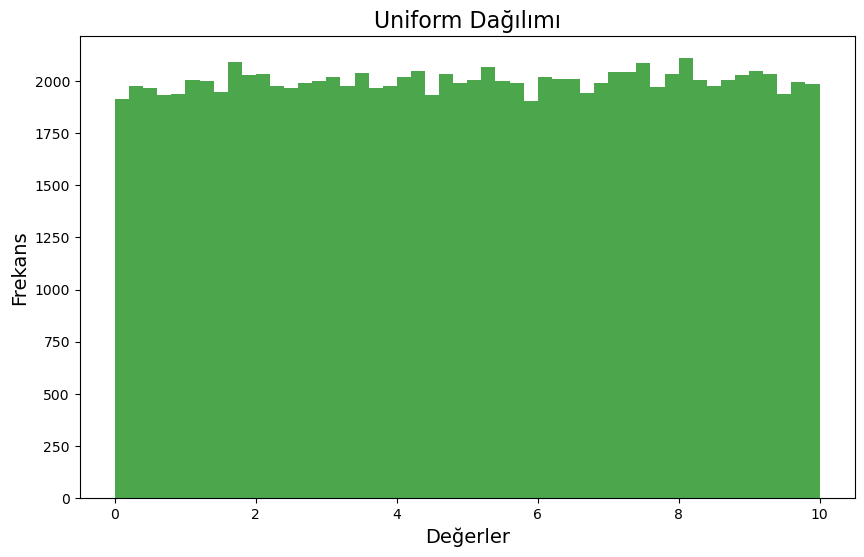

In [59]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='green', alpha=0.7)
plt.title('Uniform Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [60]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [61]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)

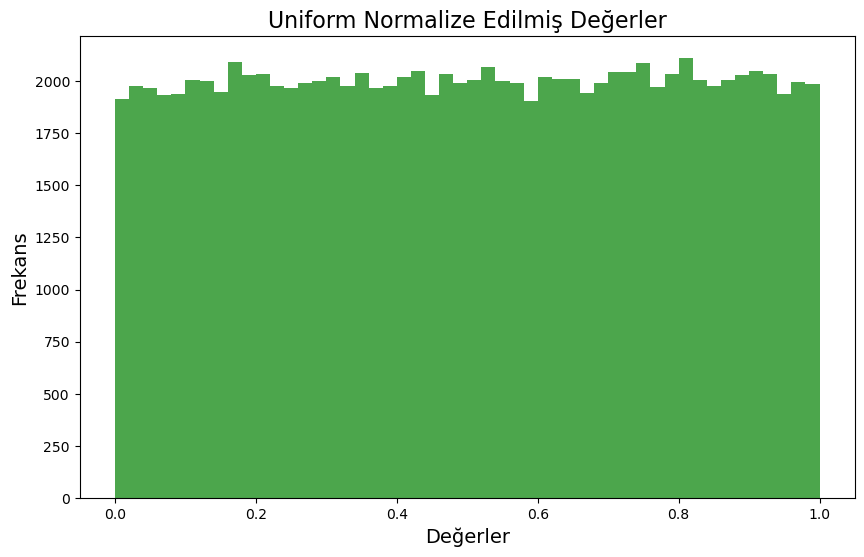

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Uniform Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [63]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,8.987185,0.898724
1,5.586348,0.558631
2,6.660821,0.666082
3,2.728758,0.272865
4,8.430108,0.843015


In [64]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,6.600241,0.660024
99996,5.375191,0.537515
99997,4.871949,0.487190
99998,0.647227,0.064706
99999,9.975046,0.997513


In [65]:
df['Değerler'].describe()

count    100000.000000
mean          5.017581
std           2.880792
min           0.000184
25%           2.521361
50%           5.025983
75%           7.515414
max           9.999914
Name: Değerler, dtype: float64

In [66]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.501753
std           0.288087
min           0.000000
25%           0.252125
50%           0.502593
75%           0.751543
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [67]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

0

In [68]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

0

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle T Student Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [69]:
data = np.random.standard_t(df=5, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])

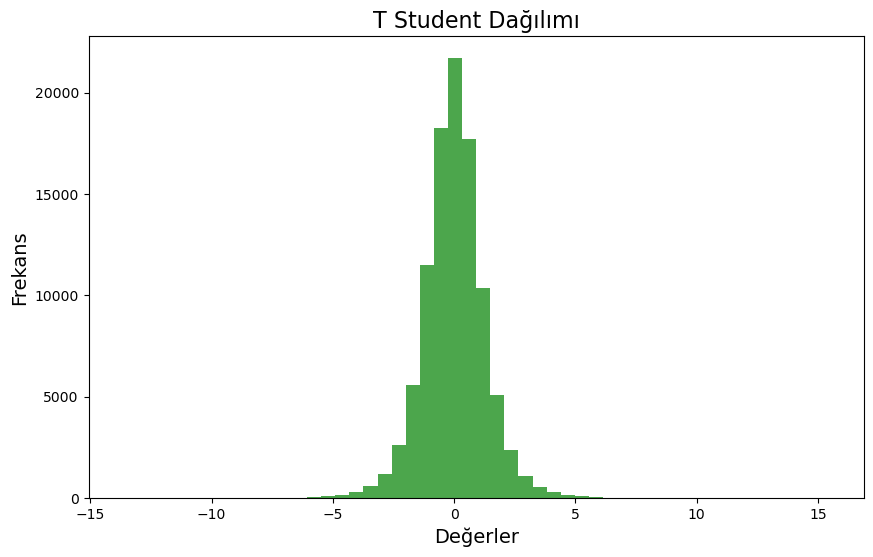

In [70]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df,bins=50, color='green', alpha=0.7)
plt.title('T Student Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [71]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [72]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


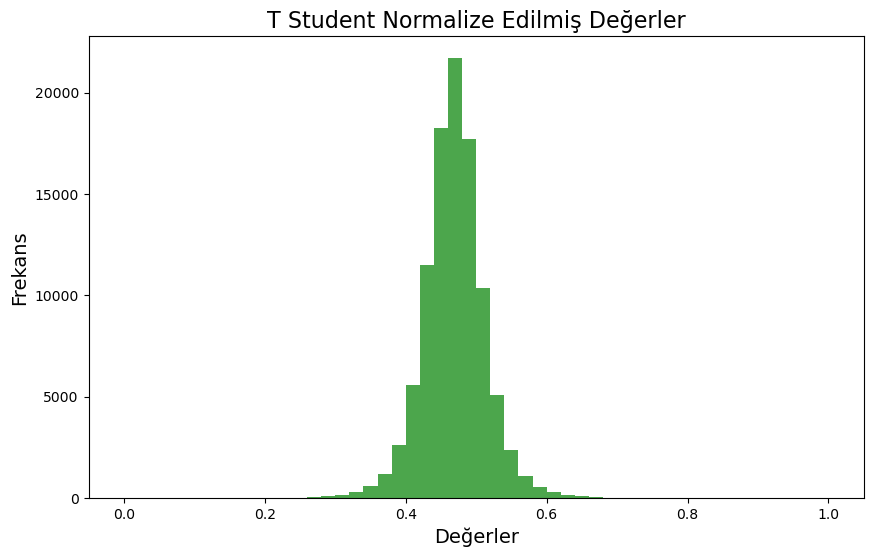

In [73]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('T Student Normalize Edilmiş Değerler', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [74]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

3398

In [75]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

3398